In [1]:
pkg load signal

## 1D Wiener filter
To begin, set index of slice on which to operate, and the filter orders to test.

In [2]:
slice_idx     = 1;
filter_orders = 1:10;

Get required autocorrelations.

In [3]:
[r_v, lag_v] = autocorrelation_estimation.get_rv('good');
[r_x, lag_x] = autocorrelation_estimation.get_rx('good');

Perform channel combination on both reference ('good') and actual ('bad') data.

In [4]:
good_data = MRI_data.get_good(slice_idx,1) + MRI_data.get_good(slice_idx,2) + MRI_data.get_good(slice_idx,3);
bad_data  = MRI_data.get_bad(slice_idx,1)  + MRI_data.get_bad(slice_idx,2)  + MRI_data.get_bad(slice_idx,3);

Build 1D Wiener filters for the required orders, use them to fill the gaps and plot images for the results.

Source MSE: 1.8176e+01
Order 1 MSE: 1.6534e+01
Order 2 MSE: 1.6553e+01
Order 3 MSE: 1.6524e+01
Order 4 MSE: 1.6605e+01
Order 5 MSE: 1.6562e+01
Order 6 MSE: 1.6560e+01
Order 7 MSE: 1.6553e+01
Order 8 MSE: 1.6556e+01
Order 9 MSE: 1.6554e+01
Order 10 MSE: 1.6552e+01


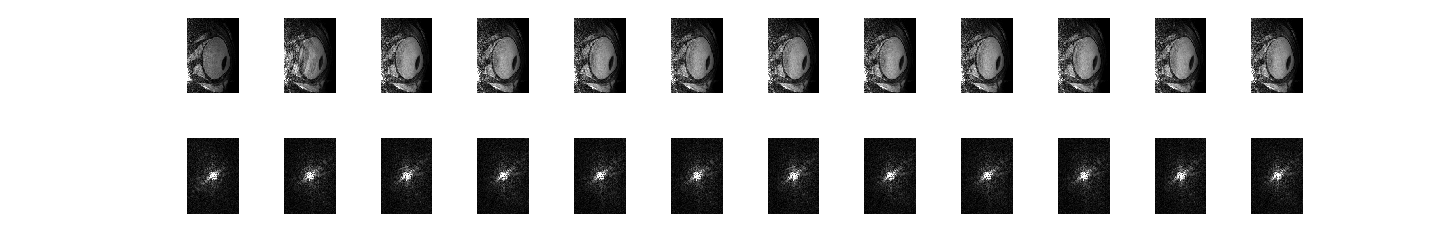

In [5]:
order_num = length(filter_orders); % calculate the amount of subfigures

display_tools.make_wide_image(1, 2/(order_num+2))

subplot(2,order_num+2,1);           MRI_image.plot_from_kspace(good_data); title("Good");
subplot(2,order_num+2,order_num+3); MRI_image.plot_in_kspace(good_data);

subplot(2,order_num+2,2);           MRI_image.plot_from_kspace(bad_data); title("Source");
subplot(2,order_num+2,order_num+4); MRI_image.plot_in_kspace(bad_data);

printf("Source MSE: %.4e\n", MSE.from_kspace(bad_data, good_data) );

offset = 0; % stores where the image is stored
for side_length = filter_orders
    w             = wiener_filter.get_1D(side_length, r_v, lag_v, r_x, lag_x);
    filtered_data = wiener_filter.apply_1D(w, bad_data);
    repaired_data = gap_filling.fill_gaps(bad_data, filtered_data);

    offset = offset + 1; % calculate where to place image
    subplot(2,order_num+2,offset+2);           MRI_image.plot_from_kspace(repaired_data); title(sprintf("Wiener %d", side_length));
    subplot(2,order_num+2,offset+order_num+4); MRI_image.plot_in_kspace(repaired_data);

    filename          = sprintf('Export/Comparison_1D_%d.png', side_length);
    filename_spectrum = sprintf('Export/Comparison_1D_%d_kspace.png', side_length);
    imwrite(uint8(255*MRI_image.from_kspace(repaired_data)), filename);
    imwrite(uint8(255*MRI_image.normalise_by_histogram(abs(repaired_data))), filename_spectrum);

    printf("Order %d MSE: %.4e\n", side_length, MSE.from_kspace(repaired_data, good_data) );
end

## 2D Wiener filter

To begin, set index of slice on which to operate, and the filter orders to test.

In [6]:
slice_idx     = 1;
filter_orders = 1:10;

Estimate the autocorrelation to later use to build the Wiener filters.

In [7]:
[R_x, lag_x_y, lag_x_x] = autocorrelation_estimation.get_Rx_2D(2*max(filter_orders));

Perform channel combination on both reference ('good') and actual ('bad') data.

In [8]:
good_data = MRI_data.get_good(slice_idx,1) + MRI_data.get_good(slice_idx,2) + MRI_data.get_good(slice_idx,3);
bad_data  = MRI_data.get_bad(slice_idx,1)  + MRI_data.get_bad(slice_idx,2)  + MRI_data.get_bad(slice_idx,3);

Build 2D Wiener filters for the required orders, use them to fill the gaps and plot images for the results.

Order 1 MSE: 1.6510e+01
Order 2 MSE: 1.6499e+01
Order 3 MSE: 1.6459e+01
Order 4 MSE: 1.6481e+01
Order 5 MSE: 1.6663e+01
Order 6 MSE: 1.6711e+01
Order 7 MSE: 1.6717e+01
Order 8 MSE: 1.6762e+01
Order 9 MSE: 1.6765e+01
Order 10 MSE: 1.6764e+01


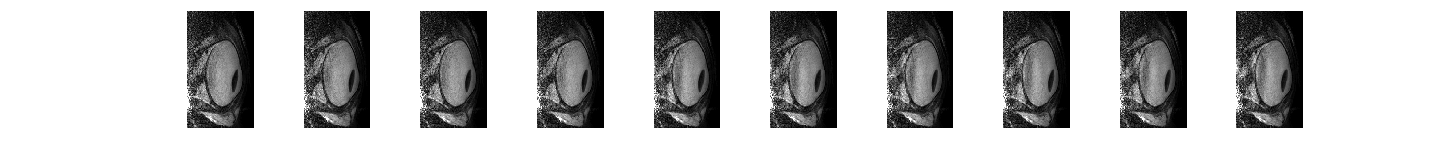

In [9]:
order_num = length(filter_orders); % calculate the amount of subfigures

display_tools.make_wide_image(1,0.1);

offset = 0; % stores where the image is stored
for side_length = filter_orders
    w_2D = wiener_filter.get_2D(side_length, R_x);
    filtered_data = wiener_filter.apply_2D(w_2D, bad_data);
    repaired_data = gap_filling.fill_gaps(bad_data, filtered_data);
    
    offset = offset + 1; % calculate where to place image
    subplot(1,order_num,offset);
    MRI_image.plot_from_kspace(repaired_data); title(sprintf("2D Wiener %d", side_length));
    
    filename          = sprintf('Export/Comparison_2D_%d.png', side_length);
    filename_spectrum = sprintf('Export/Comparison_2D_%d_kspace.png', side_length);
    imwrite(uint8(255*MRI_image.from_kspace(repaired_data)), filename);
    imwrite(uint8(255*MRI_image.normalise_by_histogram(abs(repaired_data))), filename_spectrum);
    
    printf("Order %d MSE: %.4e\n", side_length, MSE.from_kspace(repaired_data, good_data) )
end

## Some pretty plots

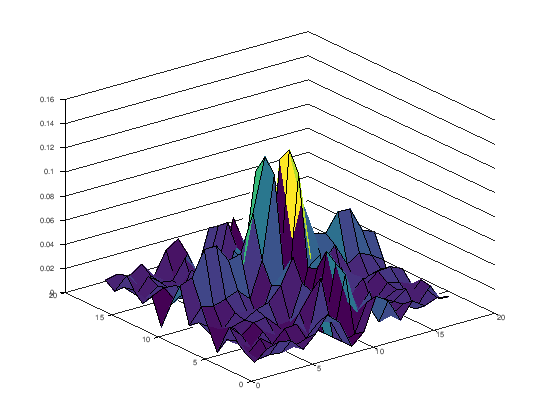

In [10]:
% plot the 10th order Wiener filter impulse response
surf(abs(wiener_filter.get_2D(8, R_x)))

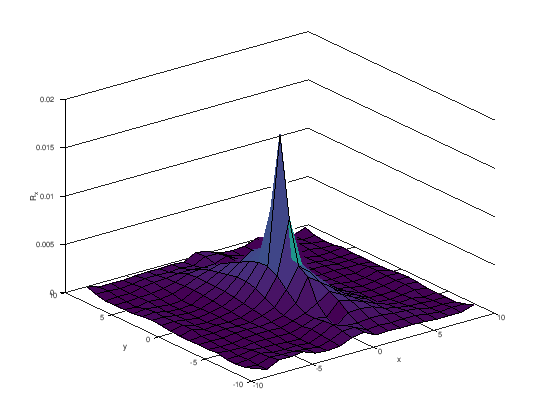

In [11]:
% plot the noise autocorrelation
[R_v, lag_v_y, lag_v_x] = autocorrelation_estimation.get_Rv_2D(10);
autocorrelation_estimation.plot_2D(lag_v_x, lag_v_y, abs(R_v))

In [12]:
% plot the signal autocorrelation
[R_x, lag_x_y, lag_x_x] = autocorrelation_estimation.get_Rx_2D(20);
autocorrelation_estimation.plot_2D(lag_x_x, lag_x_y, abs(R_x)

Iteration 72/72      


Continuation prompt found - input was incomplete:
% plot the signal autocorrelation
[R_x, lag_x_y, lag_x_x] = autocorrelation_estimation.get_Rx_2D(20);
autocorrelation_estimation.plot_2D(lag_x_x, lag_x_y, abs(R_x)
